<a href="https://colab.research.google.com/github/YashDidwania125/Data_Analytics/blob/main/AmericanUniversities_Admissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('/content/IPEDS_data.xlsx')

In [ ]:
data.shape

(1534, 145)

In [ ]:
data.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [ ]:
data.isna().sum().sort_values(ascending=False)

Endowment assets (year end) per FTE enrollment (GASB)      1018
SAT Writing 25th percentile score                           820
SAT Writing 75th percentile score                           820
Number of first-time undergraduates - foreign countries     623
Percent of first-time undergraduates - out-of-state         623
                                                           ... 
Level of institution                                          0
Control of institution                                        0
Historically Black College or University                      0
Tribal college                                                0
State abbreviation                                            0
Length: 145, dtype: int64

In [ ]:
perc_nan=data.isna().sum()/len(data)*100

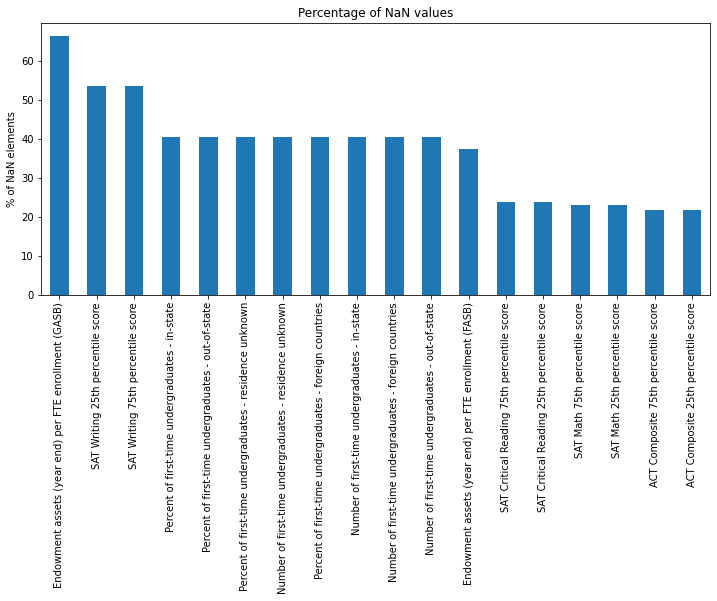

In [ ]:
ax=perc_nan[perc_nan>=20].sort_values(ascending=False).plot.bar(title='Percentage of NaN values',figsize=(12,5));
ax.set_ylabel('% of NaN elements');

In [ ]:
universitiesnw_df=data.copy()

In [ ]:
perc = 20.0
min_count =  int(((100-perc)/100)*data.shape[0] + 1)
universitiesnw_df.dropna( axis=1,thresh=min_count,inplace=True)

In [ ]:
interesting_columns=['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree","Offers Master's degree",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice", 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',
       ]

In [ ]:
universitiesnw_df=universitiesnw_df[interesting_columns]

In [ ]:
selected_rows = universitiesnw_df[universitiesnw_df.isnull().all(axis=1)]
selected_rows

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"


In [ ]:
universitiesnw_df.shape

(1534, 28)

In [ ]:
col=universitiesnw_df.select_dtypes(include=['float64','int64']).columns
col

Index(['year', 'Applicants total', 'Admissions total', 'Enrolled total',
       'Estimated enrollment, total', 'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total'],
      dtype='object')

In [ ]:
lt=list()
for i in col:
    y=any(x < 0 for x in universitiesnw_df[i])
    if y==True:
        lt.append(y)
print('There are {} negative values in the data frame.'.format(len(lt)))

There are 0 negative values in the data frame.


In [ ]:
total_zero=(universitiesnw_df[universitiesnw_df.loc[0:]==0]).count().sum()
print('This data set contains {} zero values.'.format(total_zero))

This data set contains 395 zero values.


In [ ]:
universitiesnw_df.replace(0,np.nan,inplace=True)

In [ ]:
universitiesnw_df[['Name','Applicants total']].sort_values('Applicants total').head()

,Name,Applicants total
1343,Goddard College,4.0
331,Shimer College,28.0
1500,Trine University-Regional/Non-Traditional Camp...,33.0
1479,Brandman University,34.0
1046,Marylhurst University,36.0


In [ ]:
universitiesnw_df.columns

Index(['Name', 'year', 'Highest degree offered', 'Offers Bachelor's degree',
       'Offers Master's degree',
       'Offers Doctor's degree - research/scholarship',
       'Offers Doctor's degree - professional practice', 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Full-time enrollment',
       'Part-time enrollment', 'Undergraduate enrollment',
       'Graduate enrollment', 'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduati

In [ ]:
def remove_space(list_headers,charact): #charact should be: charact=[' - ',' ']
    new_headers=list()
    for header in list_headers:
        for char in charact:      
            if char in header:
                header=header.replace(char,'_')
            header=header
        new_headers.append(header)
    return new_headers

In [ ]:
def remove_sp_char(headers,chars):
    new_headers=list()
    for header in headers:    
        for char in chars:
            if char=='-' or char=='/':
                header=header.replace(char,'_')
            if char in header:
                header=header.replace(char,'')
            
            header=header   
        new_headers.append(header)
    return new_headers    

In [ ]:
headers=remove_space(universitiesnw_df.columns,[' - ',' '])

In [ ]:
headers=remove_sp_char(headers,["'",',',':','-','/'])

In [ ]:
list_new_header=list()

for header in headers:
    header=header.casefold()   # All capitalized letters are changed.
    
    if "degrese" in header:    # One column name has a typo.  
        header=header.replace("degrese",'degrees')
            
    list_new_header.append(header)

In [ ]:
universitiesnw_df.columns=list_new_header

In [ ]:
universitiesnw_df.columns

Index(['name', 'year', 'highest_degree_offered', 'offers_bachelors_degree',
       'offers_masters_degree', 'offers_doctors_degree_research_scholarship',
       'offers_doctors_degree_professional_practice', 'applicants_total',
       'admissions_total', 'enrolled_total', 'estimated_enrollment_total',
       'tuition_and_fees_2013_14',
       'total_price_for_in_state_students_living_on_campus_2013_14',
       'total_price_for_out_of_state_students_living_on_campus_2013_14',
       'state_abbreviation', 'control_of_institution', 'full_time_enrollment',
       'part_time_enrollment', 'undergraduate_enrollment',
       'graduate_enrollment', 'full_time_undergraduate_enrollment',
       'part_time_undergraduate_enrollment',
       'percent_of_total_enrollment_that_are_women',
       'percent_of_undergraduate_enrollment_that_are_women',
       'percent_of_graduate_enrollment_that_are_women',
       'graduation_rate_bachelor_degree_within_4_years_total',
       'graduation_rate_bachelor_deg

In [ ]:
universitiesnw_df.rename(columns={'state_abbreviation':'state'}, inplace=True)

In [ ]:
universitiesnw_df[['state']].head(2)

,state
0,Alabama
1,Alabama


In [ ]:
universitiesnw_df.describe()

,year,applicants_total,admissions_total,enrolled_total,estimated_enrollment_total,tuition_and_fees_2013_14,total_price_for_in_state_students_living_on_campus_2013_14,total_price_for_out_of_state_students_living_on_campus_2013_14,full_time_enrollment,part_time_enrollment,undergraduate_enrollment,graduate_enrollment,full_time_undergraduate_enrollment,part_time_undergraduate_enrollment,percent_of_total_enrollment_that_are_women,percent_of_undergraduate_enrollment_that_are_women,percent_of_graduate_enrollment_that_are_women,graduation_rate_bachelor_degree_within_4_years_total,graduation_rate_bachelor_degree_within_5_years_total,graduation_rate_bachelor_degree_within_6_years_total
count,1534.0,1376.000000,1376.000000,1376.000000,1532.000000,1497.000000,1400.000000,1400.000000,1530.000000,1507.000000,1522.000000,1269.000000,1519.000000,1495.000000,1529.000000,1518.000000,1268.000000,1457.000000,1468.000000,1469.000000
mean,2013.0,6395.837936,3557.463663,1043.804506,7033.115535,20727.490314,34935.306429,38767.612857,5378.515686,1726.798938,5569.237845,1855.819543,4546.317314,1050.517726,58.024853,57.320158,63.159306,37.938916,50.059946,53.442478
std,0.0,8788.972944,4309.957540,1285.324785,9387.648898,12455.805360,13283.049319,10716.524007,7476.855128,2937.942843,7252.465825,2939.482145,6053.531083,2141.386454,11.512998,11.533174,14.041089,21.668924,19.974502,18.790730
min,2013.0,4.000000,4.000000,2.000000,68.000000,1032.000000,9768.000000,9768.000000,1.000000,2.000000,11.000000,1.000000,1.000000,2.000000,3.000000,8.000000,9.000000,1.000000,2.000000,2.000000
25%,2013.0,1491.750000,951.500000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1200.750000,186.000000,1347.000000,216.000000,1119.500000,98.500000,52.000000,52.000000,55.000000,21.000000,36.000000,41.000000
50%,2013.0,3360.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,2331.500000,695.000000,2516.500000,728.000000,2087.000000,336.000000,58.000000,57.000000,64.000000,34.000000,49.000000,53.000000
75%,2013.0,7020.500000,4207.500000,1246.500000,8376.000000,29992.000000,44835.750000,45907.500000,6094.250000,2112.500000,6443.000000,2180.000000,5251.500000,1101.500000,63.000000,62.000000,72.000000,53.000000,63.250000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,50012.000000,40985.000000,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
high_app_df=universitiesnw_df[['name','applicants_total']].sort_values('applicants_total',ascending=False).head(20)

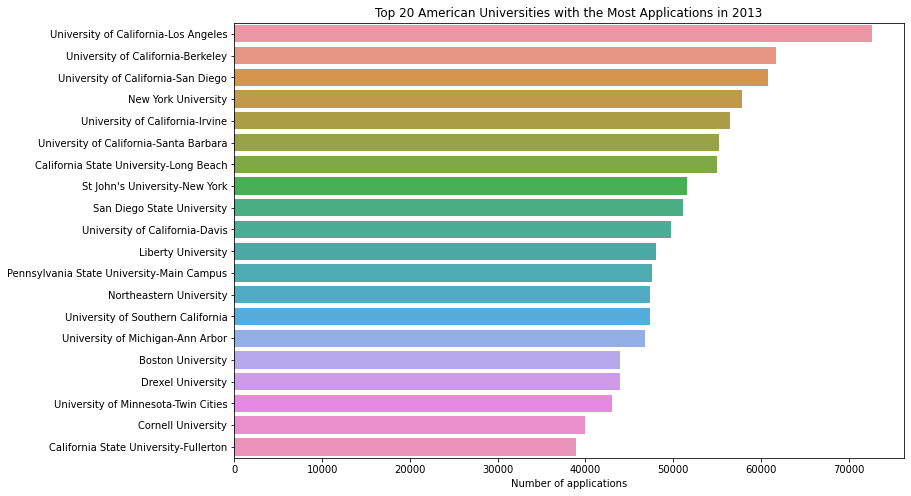

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='applicants_total',y='name',data=high_app_df)
plt.title('Top 20 American Universities with the Most Applications in 2013')
plt.xlabel('Number of applications')
plt.ylabel('');

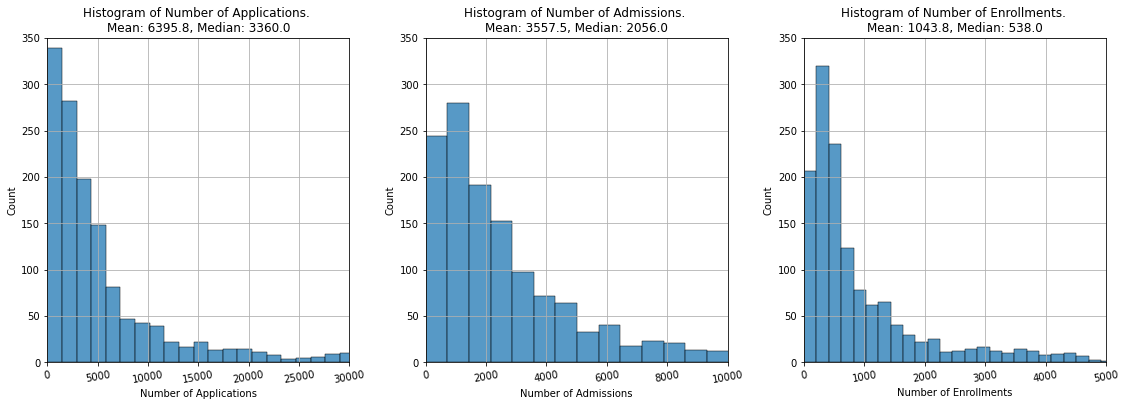

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.histplot(universitiesnw_df.applicants_total,bins=50)
plt.title('''Histogram of Number of Applications. 
Mean: {:.1f}, Median: {:.1f}'''.format(universitiesnw_df.applicants_total.mean(),universitiesnw_df.applicants_total.median()));
plt.xlabel('Number of Applications')
plt.axis([0,30000,0,350])
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,2)
sns.histplot(universitiesnw_df.admissions_total,bins=50)
plt.title('''Histogram of Number of Admissions. 
Mean: {:.1f}, Median: {:.1f}'''.format(universitiesnw_df.admissions_total.mean(),universitiesnw_df.admissions_total.median()));
plt.axis([0,10000,0,350])
plt.xlabel('Number of Admissions')
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,3)
sns.histplot(universitiesnw_df.enrolled_total,bins=50)
plt.title('''Histogram of Number of Enrollments. 
Mean: {:.1f}, Median: {:.1f}'''.format(universitiesnw_df.enrolled_total.mean(),universitiesnw_df.enrolled_total.median()));
plt.axis([0,5000,0,350])
plt.xlabel('Number of Enrollments')
plt.grid()
plt.xticks(rotation=10)
plt.tight_layout(pad=2);

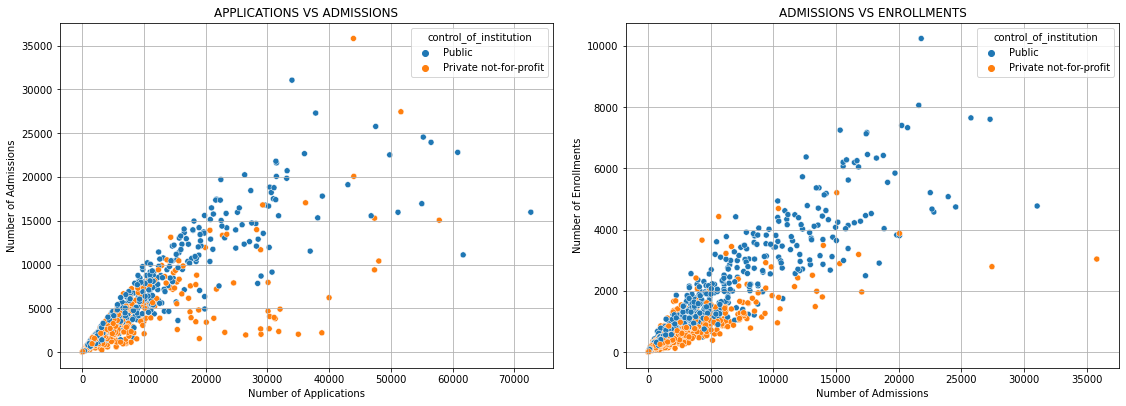

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('APPLICATIONS VS ADMISSIONS')
sns.scatterplot(y=universitiesnw_df.admissions_total,x=universitiesnw_df.applicants_total,hue=universitiesnw_df.control_of_institution)
plt.ylabel('Number of Admissions')
plt.xlabel('Number of Applications')
plt.grid()

plt.subplot(1,2,2)
plt.title('ADMISSIONS VS ENROLLMENTS')
sns.scatterplot(x='admissions_total',y='enrolled_total',data=universitiesnw_df,hue='control_of_institution')
plt.ylabel('Number of Enrollments')
plt.xlabel('Number of Admissions')
plt.grid()

plt.tight_layout(pad=2)

In [ ]:
universitiesnw_df['acceptance_rate']=(universitiesnw_df.admissions_total/universitiesnw_df.applicants_total*100).round(2)

In [ ]:
universitiesnw_df['enrollment_rate']=(universitiesnw_df.enrolled_total/universitiesnw_df.admissions_total*100).round(2)

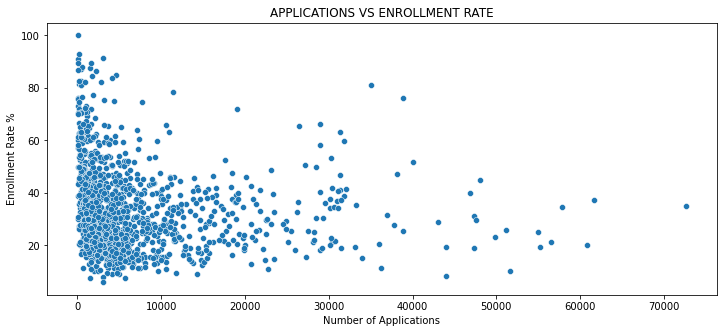

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='applicants_total',y='enrollment_rate',data=universitiesnw_df)
plt.title('APPLICATIONS VS ENROLLMENT RATE')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Number of Applications');

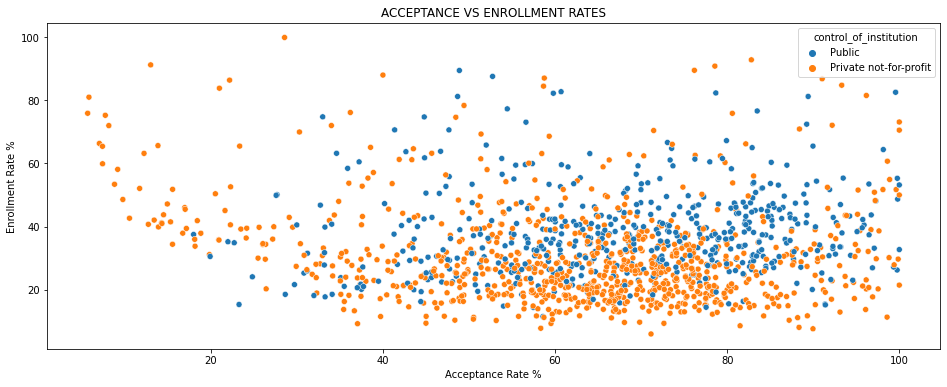

In [ ]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='acceptance_rate',y='enrollment_rate',data=universitiesnw_df,hue=universitiesnw_df.control_of_institution)
plt.title('ACCEPTANCE VS ENROLLMENT RATES')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Acceptance Rate %');

In [ ]:
high_acceptance=universitiesnw_df[universitiesnw_df.acceptance_rate.notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending=False).head(25)

In [ ]:
low_acceptance=universitiesnw_df[universitiesnw_df.acceptance_rate.notnull()][['name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending=False).tail(25)

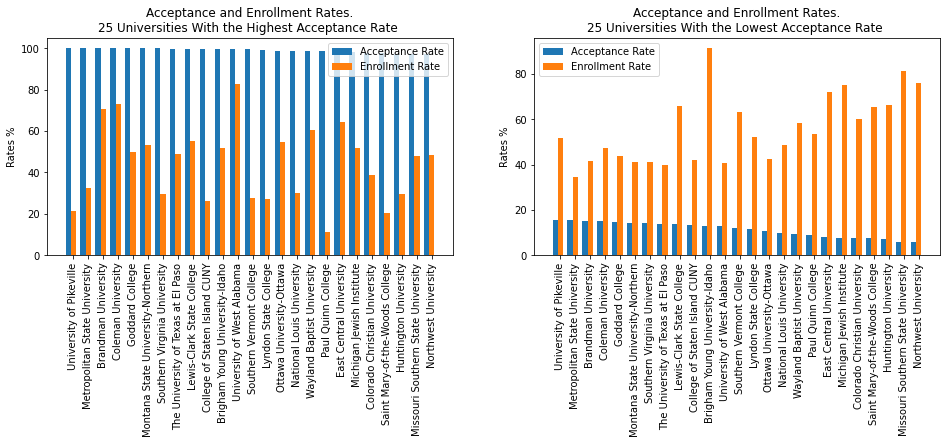

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ind = np.arange(len(high_acceptance)) #number of universities
width = 0.35       #space

plt.bar(ind, high_acceptance.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind + width, high_acceptance.enrollment_rate, width,label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
25 Universities With the Highest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(ind + width,high_acceptance.name.values,rotation=90 )
plt.legend(loc='best');

plt.subplot(1,2,2)
ind = np.arange(len(low_acceptance)) #number of universities
width = 0.35       #space

plt.bar(ind, low_acceptance.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind + width, low_acceptance.enrollment_rate, width,label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
25 Universities With the Lowest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(ind + width,high_acceptance.name.values,rotation=90 )
plt.legend(loc='best');

In [ ]:
#spliting the number of applications according to the type of control: private or public.
uni_private_df=universitiesnw_df[universitiesnw_df.control_of_institution=='Private not-for-profit']
uni_private_df=uni_private_df[uni_private_df.applicants_total.notnull()]

uni_public_df=universitiesnw_df[universitiesnw_df.control_of_institution=='Public']
uni_public_df=uni_public_df[uni_public_df.applicants_total.notnull()]

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


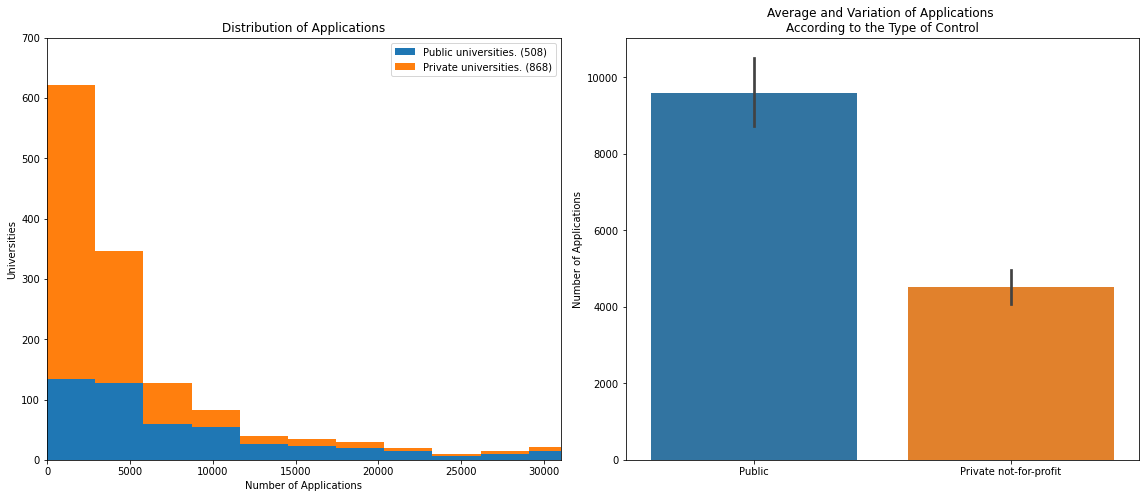

In [ ]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
plt.hist([uni_public_df.applicants_total,uni_private_df.applicants_total],stacked=True,bins=25)
plt.axis([0,31000,0,700])
plt.title('Distribution of Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Universities')
plt.legend(['Public universities. ({})'.format(len(uni_public_df)),'Private universities. ({})'.format(len(uni_private_df))]);

plt.subplot(1,2,2)
sns.barplot(x=universitiesnw_df.control_of_institution,y=universitiesnw_df.applicants_total);
plt.title('''Average and Variation of Applications 
According to the Type of Control''')
plt.xlabel('')
plt.ylabel('Number of Applications');
plt.tight_layout(pad=1)

In [ ]:
print('The minimum number of applications for private universities was {}; whereas, for public universities was {}.'.format(int(uni_private_df.applicants_total.min()),int(uni_public_df.applicants_total.min())))

The minimum number of applications for private universities was 4; whereas, for public universities was 193.


In [ ]:
print('The maximum number of applications for private universities was {}; whereas, for public universities was {}.'.format(int(uni_private_df.applicants_total.max()), int(uni_public_df.applicants_total.max())))

The maximum number of applications for private universities was 57845; whereas, for public universities was 72676.


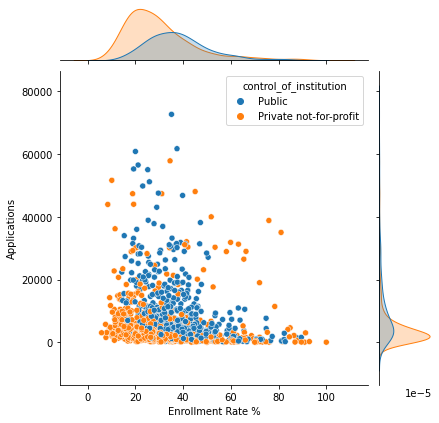

In [ ]:
g=sns.jointplot(x=universitiesnw_df.enrollment_rate,y=universitiesnw_df.applicants_total,hue=universitiesnw_df.control_of_institution,height=6);
g=(g.set_axis_labels("Enrollment Rate %","Applications"));

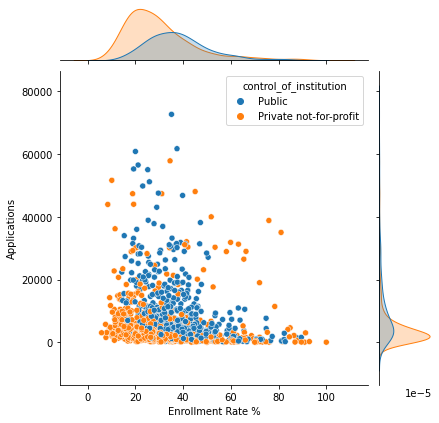

In [ ]:
g=sns.jointplot(x=universitiesnw_df.enrollment_rate,y=universitiesnw_df.applicants_total,hue=universitiesnw_df.control_of_institution,height=6);
g=(g.set_axis_labels("Enrollment Rate %","Applications"));

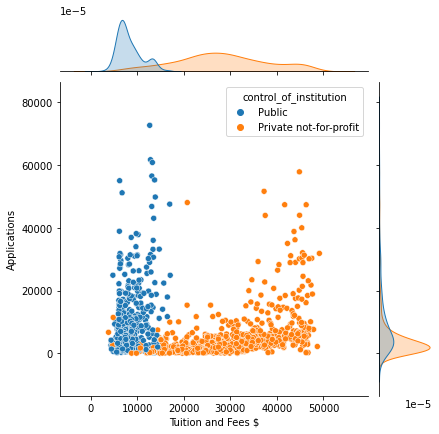

In [ ]:
g=sns.jointplot(x=universitiesnw_df.tuition_and_fees_2013_14,y=universitiesnw_df.applicants_total,hue=universitiesnw_df.control_of_institution,height=6);
g=(g.set_axis_labels("Tuition and Fees $","Applications"))

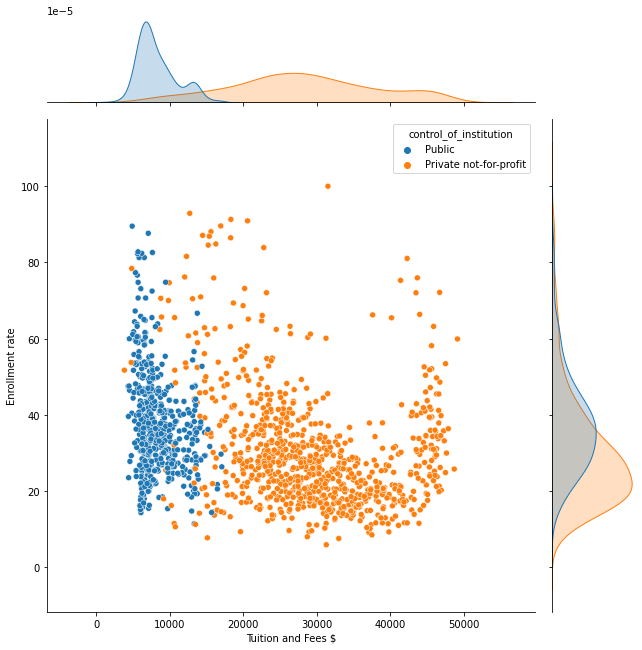

In [ ]:
g=sns.jointplot(x=universitiesnw_df.tuition_and_fees_2013_14,y=universitiesnw_df.enrollment_rate,hue=universitiesnw_df.control_of_institution,height=9);
g=(g.set_axis_labels('Tuition and Fees $','Enrollment rate'))

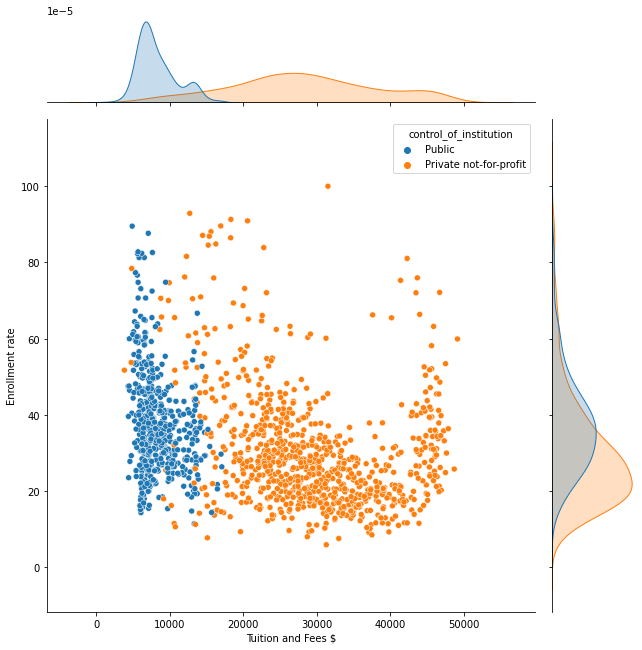

In [ ]:
g=sns.jointplot(x=universitiesnw_df.tuition_and_fees_2013_14,y=universitiesnw_df.enrollment_rate,hue=universitiesnw_df.control_of_institution,height=9);
g=(g.set_axis_labels('Tuition and Fees $','Enrollment rate'))

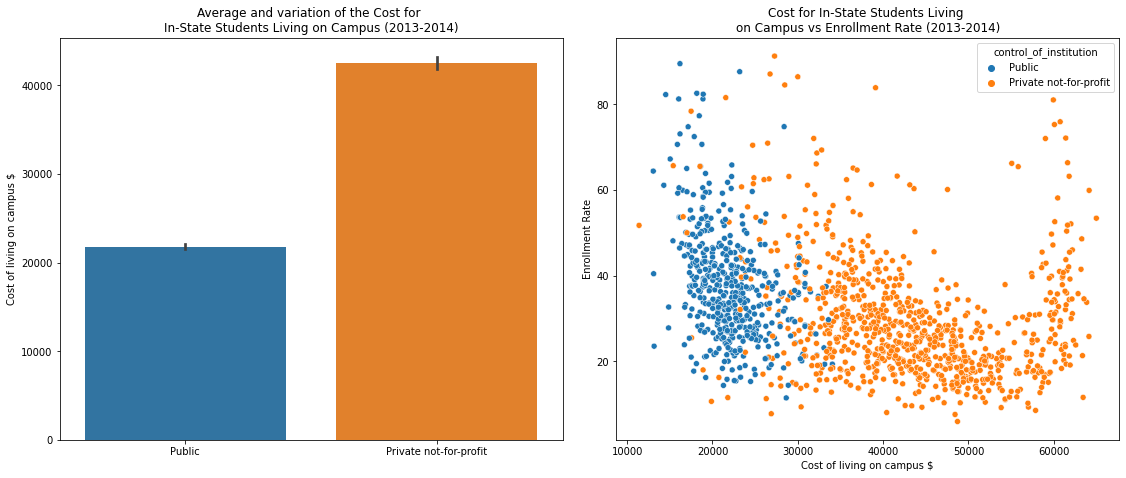

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.barplot(y=universitiesnw_df.total_price_for_in_state_students_living_on_campus_2013_14,x=universitiesnw_df.control_of_institution)
plt.title('''Average and variation of the Cost for 
In-State Students Living on Campus (2013-2014)''')        
plt.xlabel('')
plt.ylabel('Cost of living on campus $')


plt.subplot(1,2,2)
sns.scatterplot(x=universitiesnw_df.total_price_for_in_state_students_living_on_campus_2013_14,y=universitiesnw_df.enrollment_rate,hue=universitiesnw_df.control_of_institution);
plt.title('''Cost for In-State Students Living 
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')


plt.tight_layout(pad=2)

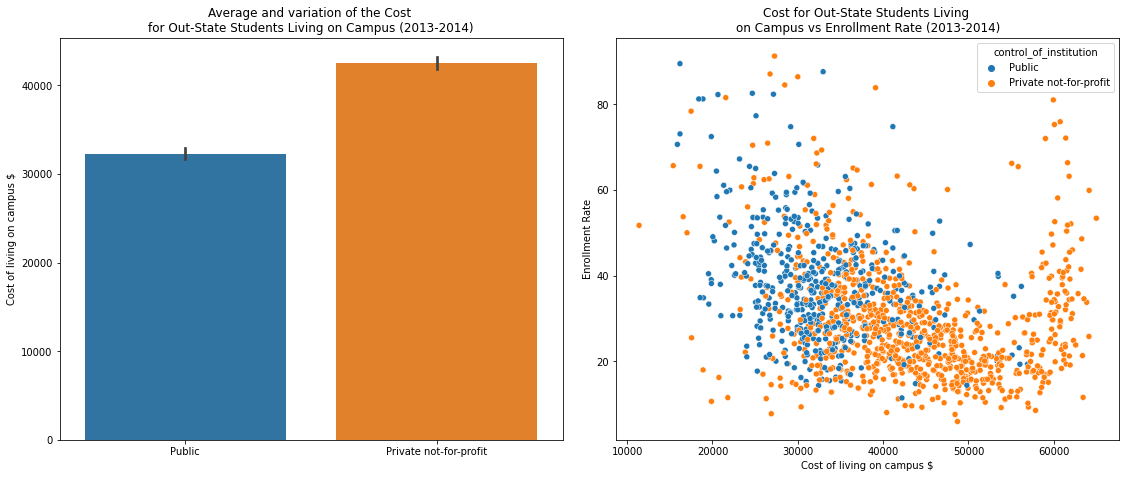

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,2)
sns.scatterplot(x=universitiesnw_df.total_price_for_out_of_state_students_living_on_campus_2013_14,y=universitiesnw_df.enrollment_rate,hue=universitiesnw_df.control_of_institution);
plt.title('''Cost for Out-State Students Living 
on Campus vs Enrollment Rate (2013-2014)''')
plt.xlabel('Cost of living on campus $')
plt.ylabel('Enrollment Rate')

plt.subplot(1,2,1)
sns.barplot(y=universitiesnw_df.total_price_for_out_of_state_students_living_on_campus_2013_14,x=universitiesnw_df.control_of_institution)
plt.title('''Average and variation of the Cost 
for Out-State Students Living on Campus (2013-2014)''')        
plt.xlabel('')
plt.ylabel('Cost of living on campus $')

plt.tight_layout(pad=2)

In [ ]:
region=pd.read_csv('region.csv')

In [ ]:
universitiesnw_df=universitiesnw_df.merge(region,on='state')

In [ ]:
in_state_df=universitiesnw_df[['name','enrollment_rate','total_price_for_in_state_students_living_on_campus_2013_14','control_of_institution','state','region']]
in_state_df=in_state_df.rename(columns={'total_price_for_in_state_students_living_on_campus_2013_14':'price_living'})
in_state_df['from']='In-State'

In [ ]:
out_state_df=universitiesnw_df[['name','enrollment_rate','total_price_for_out_of_state_students_living_on_campus_2013_14','control_of_institution','state','region']]
out_state_df=out_state_df.rename(columns={'total_price_for_out_of_state_students_living_on_campus_2013_14':'price_living'})
out_state_df['from']='Out-State'

In [ ]:
in_out_state_df=in_state_df.append(out_state_df,ignore_index = True)

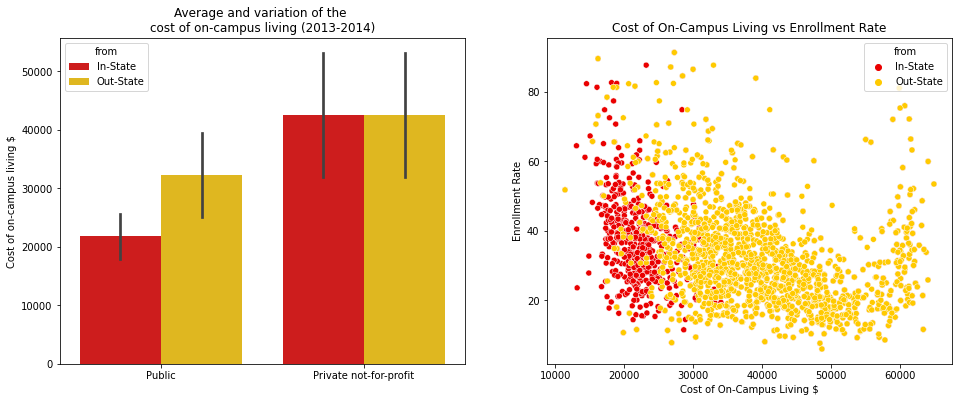

In [ ]:
plt.figure(figsize=(16,6))

#with standard deviation
plt.subplot(1,2,1)
sns.barplot(x='control_of_institution',y='price_living',data=in_out_state_df,hue='from',ci="sd",palette='hot');
plt.title('''Average and variation of the 
cost of on-campus living (2013-2014)''')
plt.xlabel('')
plt.ylabel('Cost of on-campus living $')

plt.subplot(1,2,2)
sns.scatterplot(x='price_living',y='enrollment_rate',data=in_out_state_df,hue='from',palette='hot')
plt.title('Cost of On-Campus Living vs Enrollment Rate')
plt.xlabel('Cost of On-Campus Living $')
plt.ylabel('Enrollment Rate');

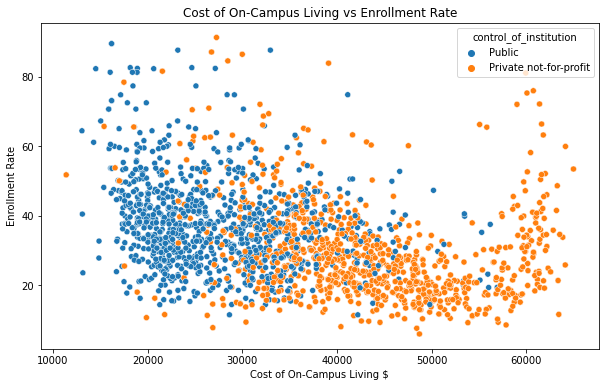

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price_living',y='enrollment_rate',data=in_out_state_df,hue='control_of_institution')
plt.title('Cost of On-Campus Living vs Enrollment Rate')
plt.xlabel('Cost of On-Campus Living $')
plt.ylabel('Enrollment Rate');

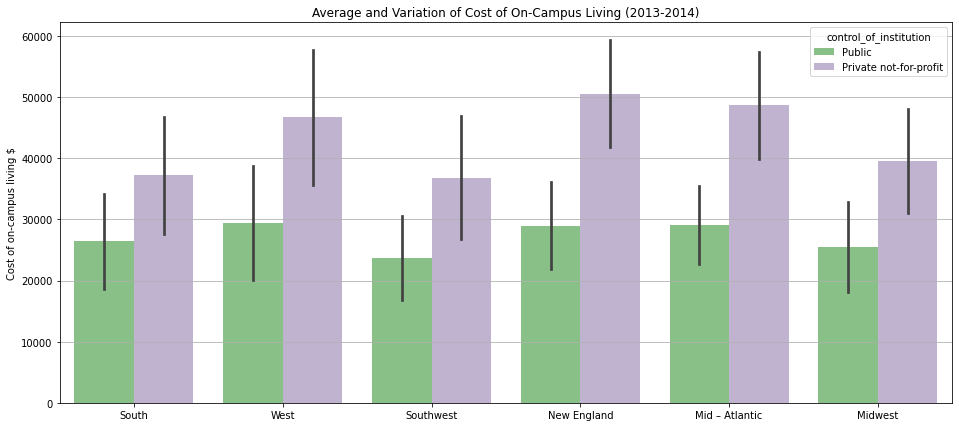

In [ ]:
plt.figure(figsize=(16,7))
sns.barplot(x='region',y='price_living',data=in_out_state_df,hue='control_of_institution',ci="sd",palette='Accent');
plt.title('Average and Variation of Cost of On-Campus Living (2013-2014)')
plt.grid(axis='y')
plt.xlabel('')
plt.ylabel('Cost of on-campus living $');

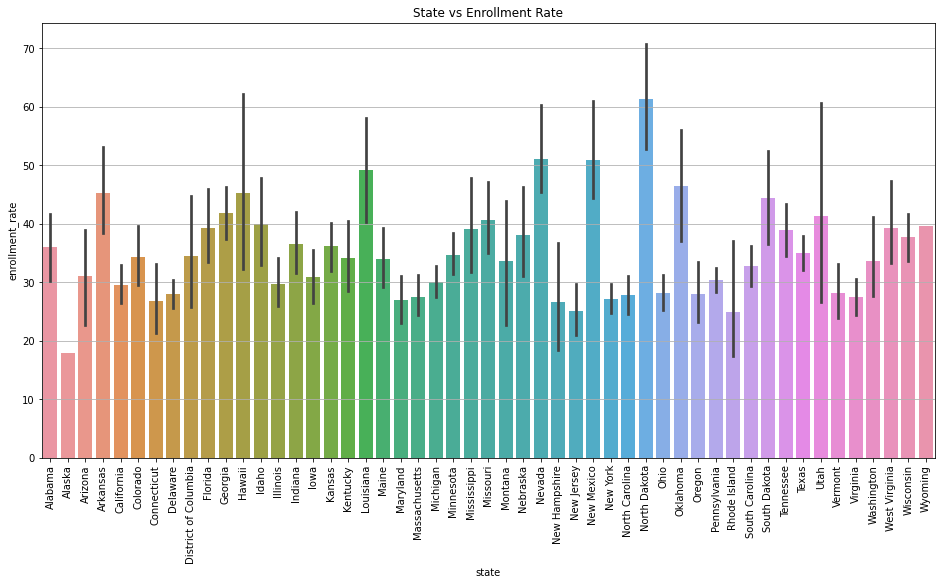

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=universitiesnw_df.state,y=universitiesnw_df.enrollment_rate);
plt.title('State vs Enrollment Rate')
plt.grid(axis='y')
plt.xticks(rotation=90);

In [ ]:
with open('states_population.csv') as file:
    population_df=pd.read_csv(file)

In [ ]:
population_df.head()

,state,population_2013
0,Alabama,4833722
1,Alaska,735132
2,Arizona,6626624
3,Arkansas,2959373
4,California,38332521


In [ ]:
universitiesnw_df=universitiesnw_df.merge(population_df,on='state')
universitiesnw_df=universitiesnw_df.rename(columns={'population_2013':'population'})

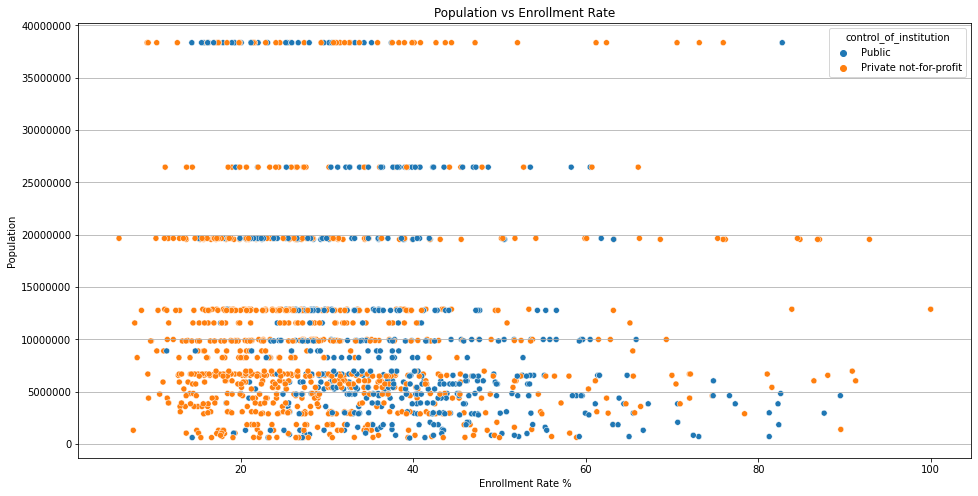

In [ ]:
plt.figure(figsize=(16,8))
ax=sns.scatterplot(y='population',x='enrollment_rate',data=universitiesnw_df,hue='control_of_institution');
plt.title('Population vs Enrollment Rate')
plt.grid(axis='y')
ax.ticklabel_format(style='plain')
plt.ylabel('Population')
plt.xlabel('Enrollment Rate %');

In [ ]:
with open('states_gdp.csv') as file:
    gdp_df=pd.read_csv(file)

In [ ]:
gdp_df.head()

,code,state,gdp_million
0,1000,Alabama,191481.0
1,2000,Alaska,56622.8
2,4000,Arizona,275199.1
3,5000,Arkansas,114251.5
4,6000,California,2262771.2


In [ ]:
gdp_df.drop(columns=['code'],inplace=True)

In [ ]:
universitiesnw_df=universitiesnw_df.merge(gdp_df,on='state')

In [ ]:
universitiesnw_df[['state','gdp_million','population']].head()

,state,gdp_million,population
0,Alabama,191481.0,4833722
1,Alabama,191481.0,4833722
2,Alabama,191481.0,4833722
3,Alabama,191481.0,4833722
4,Alabama,191481.0,4833722


In [ ]:
universitiesnw_df['gdp_capita']=universitiesnw_df.gdp_million/universitiesnw_df.population*1e6

In [ ]:
gdp_state_df=universitiesnw_df.groupby('state')[['region','gdp_capita']].mean().sort_values('gdp_capita',ascending=False)

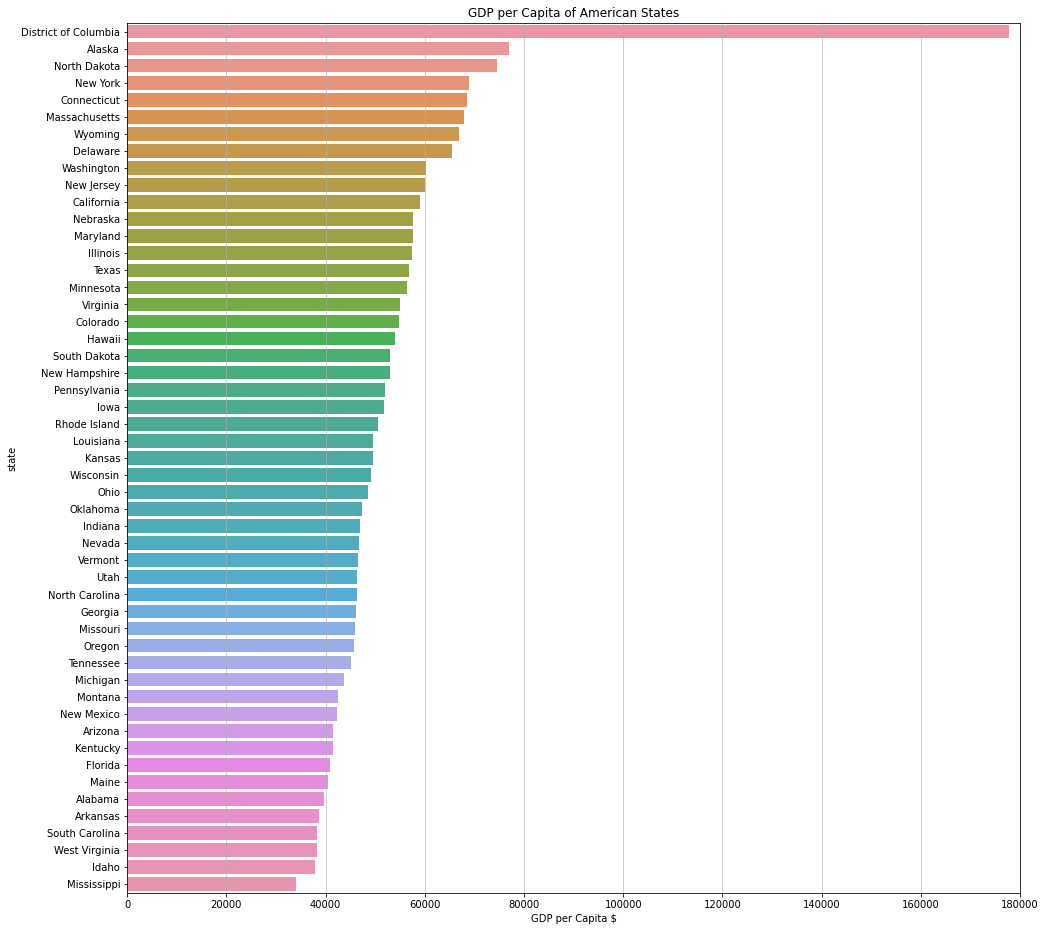

In [ ]:
plt.figure(figsize=(16,16))
ax=sns.barplot(x=gdp_state_df.gdp_capita,y=gdp_state_df.index);
ax.set_xlim((0,180000)); plt.title('GDP per Capita of American States'); plt.xlabel('GDP per Capita $');
plt.grid(axis='x',alpha=0.75)

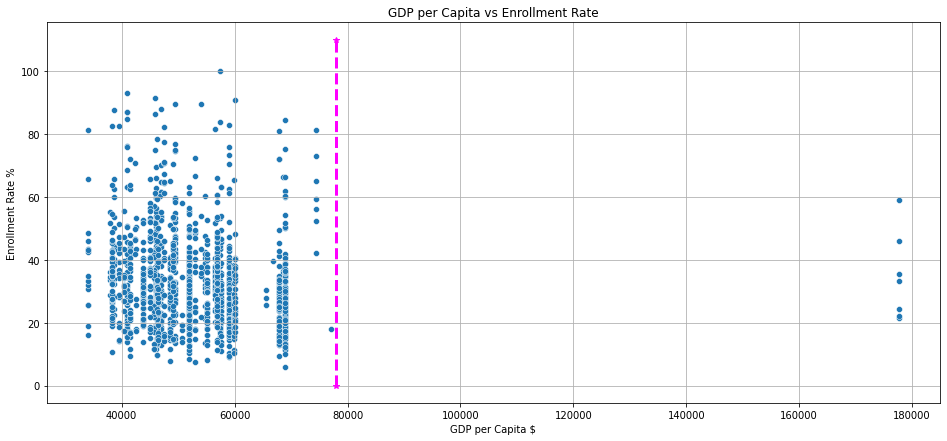

In [ ]:
plt.figure(figsize=(16,7))
sns.scatterplot(x='gdp_capita',y='enrollment_rate',data=universitiesnw_df);
plt.plot([78000,78000], [0, 110], c='magenta',lw=3,marker='*',ls='--')
plt.title('GDP per Capita vs Enrollment Rate')
plt.grid()
plt.xlabel('GDP per Capita $')
plt.ylabel('Enrollment Rate %');

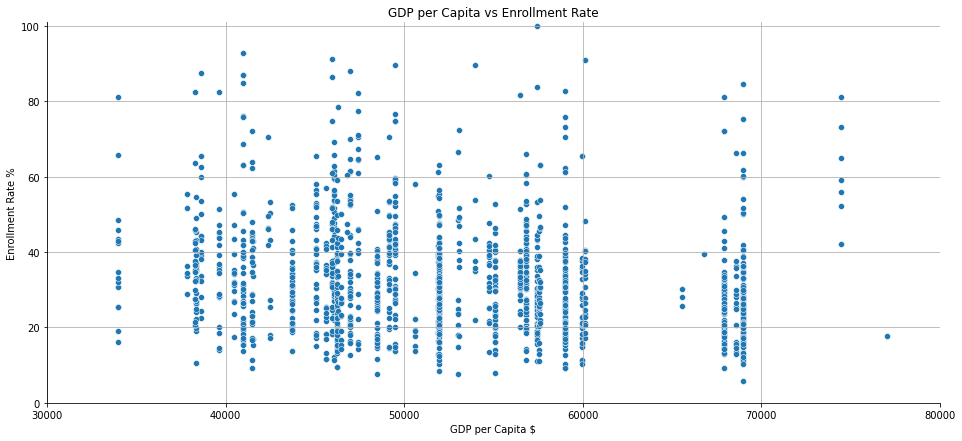

In [ ]:
plt.figure(figsize=(16,7))
sns.scatterplot(x='gdp_capita',y='enrollment_rate',data=universitiesnw_df);
plt.axis([30000,80000,0, 101]);
plt.grid();
plt.title('GDP per Capita vs Enrollment Rate')
plt.xlabel('GDP per Capita $')
plt.ylabel('Enrollment Rate %'); sns.despine();

In [ ]:
names=universitiesnw_df.columns[universitiesnw_df.columns.str.startswith('offers')].values
degree=universitiesnw_df[universitiesnw_df[names]=='Yes'][names].count().sort_values(ascending=False)

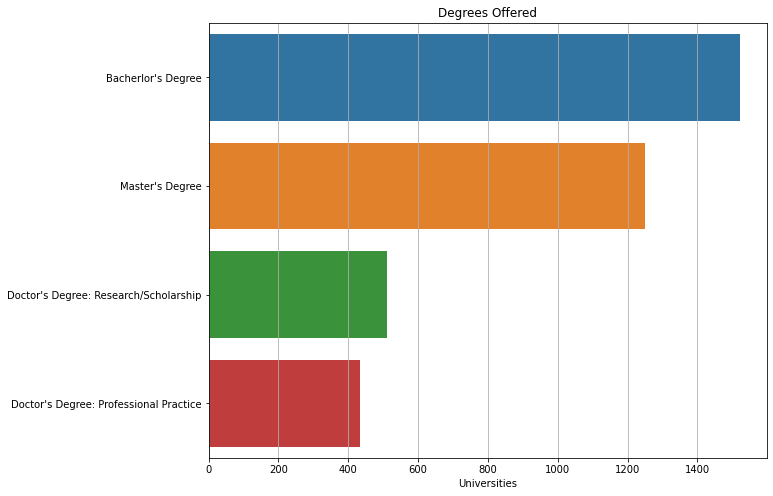

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x=degree,y=degree.index)
ax.set_yticklabels(("Bacherlor's Degree","Master's Degree",
                    "Doctor's Degree: Research/Scholarship",
                    "Doctor's Degree: Professional Practice"));
plt.title('Degrees Offered')
plt.xlabel('Universities')
plt.grid(axis='x');

In [ ]:
hg_degree=universitiesnw_df.highest_degree_offered.value_counts()

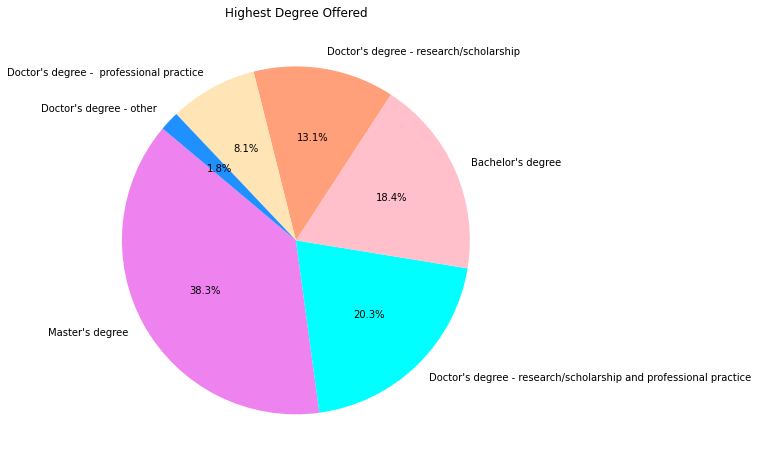

In [ ]:
plt.figure(figsize=(16,8))
plt.pie(hg_degree,labels=hg_degree.index,
       autopct='%.1f%%',startangle=140,colors = ['violet','aqua','pink','lightsalmon','moccasin','dodgerblue'])
plt.title('Highest Degree Offered');

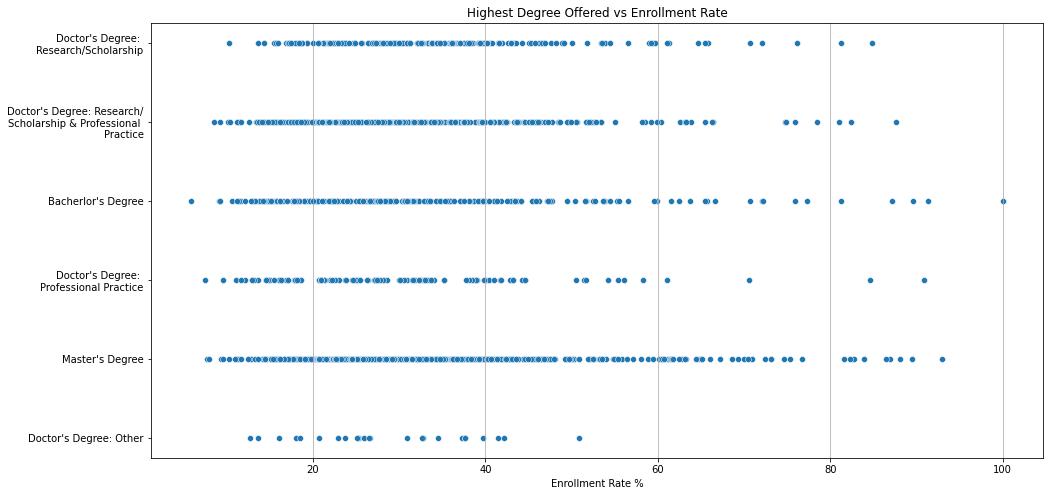

In [ ]:
plt.figure(figsize=(16,8))
ax=sns.scatterplot(y='highest_degree_offered',x='enrollment_rate',data=universitiesnw_df);
plt.title('Highest Degree Offered vs Enrollment Rate')
plt.ylabel('')
plt.xlabel('Enrollment Rate %')
plt.grid(axis='x')
ax.set_yticklabels(('''Doctor's Degree: 
Research/Scholarship''',
                    '''Doctor's Degree: Research/
Scholarship & Professional 
Practice''',
                    "Bacherlor's Degree",
                    '''Doctor's Degree: 
Professional Practice''',
                    "Master's Degree",
                    "Doctor's Degree: Other"));